In [ ]:
-- Основная функция.
-- Аргументы: str - строка, dictionary - словарь.
-- Идея: смотрим, с каких слов словаря может начинаться строка,
-- потом каждое из этих слов присоединяем к результату рекурсивного вызова функции для остатка строки.
dict :: String -> [String] -> [[String]]
dict "" dictionary = [[]]
dict str [] = [[str]]
dict str dictionary | null (getPrefixes str dictionary) = []
        | otherwise = concatMap app (getPrefixes str dictionary)
        where app word = map (word:) (dict (drop (length word) str) dictionary)

-- Вспомогательные функции.

-- Функция, определяющая, является ли слово word префиксом строки str.
isPrefix :: String -> String -> Bool
isPrefix str word = (length word <= length str) && (take (length word) str == word)

-- Функция выдает список слов из словаря dictionary, с которых начинается строка str (т.е. список всех префиксов str, входящих в dictionary).
getPrefixes :: String -> [String] -> [String]
getPrefixes str dictionary = filter (isPrefix str) dictionary

-- Тест.
test = (dict "to be or not to be" [" ", "a", "be", "is", "or", "one", "not", "that", "to"], dict "" ["some", "dictionary"], dict "some string" [])

In [ ]:
dict "madonna louise ciccone" ["come","cool","dance","in","income","musician","nude","occasional","one","two"]

In [17]:
fromDigits = foldl addDigit 0
   where addDigit num d = 10*num + d
   
digs :: Integral x => x -> [x]
digs 0 = []
digs x = digs (x `div` 10) ++ [x `mod` 10]

-- Идея: представляем все возможные выражения в виде двоичного дерева.
data Tree = Num Int | Op Tree Char Tree
-- (Красивый) вывод дерева такого типа.
instance Show Tree where
  showsPrec _ (Num n) = (show n ++)
  showsPrec _ (Op t1 op t2) | op == '-' =  ('(':) . shows t1 . (op:) . shows t2 . (')':)
                            | op == '+' = shows t1 . (op:) . shows t2
                            | op == 'l' = shows t1 . shows t2

-- Функция, вычисляющая выражение в дереве.
calculate :: Tree -> Integer
calculate (Num a) = fromIntegral a -- приведение типов!
calculate (Op t1 operation t2) | operation == '+' = calculate t1 + calculate t2
	| operation == '-' = calculate t1 - calculate t2
--    | operation == 'l' = fromDigits ((calculate t1) : (digs (calculate t2)))
    | operation == 'l' = fromDigits[calculate t1, calculate t2]
--   | operation == 'l' = fromDigits[calculate t1, calculate t2]
--    | operation == 'l' =  fromDigits (calculate t1:digs (calculate t2))


-- Строим все разбиения списка целых чисел на два его подсписка (т.е. "разбивающий" элемент пробегает по нашему списку).
allPairs :: [Int] -> [([Int], [Int])]
allPairs ls = map ((flip splitAt) ls) [1..(length ls - 1)]

-- Вставляем в пару подсписков заданный во втором аргументе знак операции.
insertOp :: [Int] -> Char -> [([Int], Char, [Int])]
insertOp ls operation = map (\(a,b) -> (a, operation, b)) (allPairs ls)

-- Строим все тройки из подсписков и операций '+', '-', '*'.
allTriples :: [Int] -> [([Int], Char, [Int])]
allTriples ls = concat (map (insertOp ls) ['+', '-', 'l'])

-- Строим все деревья указанного выше типа, в листьях которых стоят числа из заданного в первом аргументе списка.
allTrees :: [Int] -> [Tree]
allTrees [a]  = [Num a]
allTrees ls = concat (map descartesTree (allTriples ls))
                 where build op (t1, t2) = Op t1 op t2
                       descartesTree (ls1, op, ls2) = map (build op) [(t1, t2) | t1 <- allTrees ls1, t2 <- allTrees ls2] -- TODO: красиво ? чтобы не падало на больших числах ??

-- Вспомогательная функция.
-- Нужна для того, чтобы взять первое решение (т.е. подходящую расстановку знаков) из списка всех вариантов.
-- Берём из списка ls первый элемент, удовлетворяющий заданному (в первом аргументе) условию f.
find :: (a -> Bool) -> [a] -> Maybe a
find f ls = lookup True (zip (map f ls) ls) -- TODO: как сделать красиво ?

-- Стартовая функция solve.
solve' (Just res) = show res
solve' Nothing = "impossible"
solve n = solve' (find (\t -> calculate t == n) (allTrees [1..9]))

Line 30: Redundant bracket
Found:
(flip splitAt) ls
Why not:
flip splitAt lsLine 38: Use concatMap
Found:
concat (map (insertOp ls) ['+', '-', 'l'])
Why not:
concatMap (insertOp ls) ['+', '-', 'l']Line 43: Use concatMap
Found:
concat (map descartesTree (allTriples ls))
Why not:
concatMap descartesTree (allTriples ls)Line 45: Move map inside list comprehension
Found:
map (build op) [(t1, t2) | t1 <- allTrees ls1, t2 <- allTrees ls2]
Why not:
[(build op) (t1, t2) | t1 <- allTrees ls1, t2 <- allTrees ls2]

In [24]:
solve 12

"1+2+3+(4-5)+(6-7)8+9"

In [23]:
fromDigits [2, 3, 45]

275

In [ ]:
solve 1

In [ ]:
fromDigits (5 : (digs 67))

In [ ]:
digs :: Integral x => x -> [x]
digs 0 = []
digs x = digs (x `div` 10) ++ [x `mod` 10]

In [ ]:
digs 67

In [ ]:
1 + 2 + 3 + 4 + 5 + 6 + 7 - (8+9)

In [ ]:
concat [1, 2, 3, 4

In [ ]:
fromDigits [1, 24, 5, 6]

In [ ]:
let a = 1
let b = 37
fromDigits [a, b]

In [ ]:
digits 6

In [ ]:
[1] ++ [2]

In [ ]:
2 :: String

In [ ]:
show 3

In [2]:
-----
-- Калькулятор для вычисления выражений на основе Parsec
-- calcExpr "1+2-3+4*5+6*7-8-9" = 45
calcExpr :: String -> Integer
calcExpr str = let Right a = parse expr "expr" str in a

expr    = buildExpressionParser table (natural haskell)
table   = [ [op "*" (*) ]
          , [op "+" (+) , op "-" (-) ] ]
op name fun = Infix (string name >> return fun) AssocLeft

-----
-- Вычисляет все разбиения списка на подсписки
-- partitions [1,2,3] = [ [[1],[2],[3]], [[1],[2,3]], [[1,2],[3]], [[1,2,3]] ]
partitions [] = [ [] ]
partitions xs = [ elem : elems 
                | (elem, rest) <- tail $ zip (inits xs) (tails xs)
                , elems        <- partitions rest ]

-----
-- Все варианты расстановки знаков "+-*" в строке str
-- variants "123" = ["1+2+3","1+2-3","1+2*3","1-2+3","1-2-3","1-2*3","1*2+3","1*2-3","1*2*3","1+23","1-23","1*23","12+3","12-3","12*3","123"]
variants :: String -> [String]
variants str = concat [ map concat $ sequence $ intersperse ["+", "-", "*"] $ map (:[]) p | p <- partitions str ]

-----
-- Формируем Map (Полученный результат -> Список вариантов расстановки для этого результата)
varsMap :: M.Map Integer [String]
varsMap = M.fromListWith (++) [ (calcExpr v, [v]) | v <- variants "123456789" ]

-- Решение задачи
task1 = head $ [1..] \\ M.keys varsMap
task2 = fst $ maximumBy (comparing snd) [ (res, length vars) | (res, vars) <- M.toList varsMa

: 

In [26]:
-- Вычисляет все разбиения списка на подсписки
-- partitions [1,2,3] = [ [[1],[2],[3]], [[1],[2,3]], [[1,2],[3]], [[1,2,3]] ]
partitions [] = [ [] ]
partitions xs = [ elem : elems 
                | (elem, rest) <- tail $ zip (inits xs) (tails xs)
                , elems        <- partitions rest ]

-----
-- Все варианты расстановки знаков "+-*" в строке str
-- variants "123" = ["1+2+3","1+2-3","1+2*3","1-2+3","1-2-3","1-2*3","1*2+3","1*2-3","1*2*3","1+23","1-23","1*23","12+3","12-3","12*3","123"]
variants :: String -> [String]
variants str = concat [ map concat $ sequence $ intersperse ["+", "-", "*"] $ map (:[]) p | p <- partitions str ]

: 

In [78]:
quicksort :: Ord a => [a] -> [a]
quicksort list = quicksort' list []
    where
        quicksort' [] list = list
        quicksort' (x:xs) list = quicksort' (filter (< x) xs) $
                             x : quicksort' (filter (>= x) xs) list


In [83]:
fun' :: Integer -> Integer -> [Integer] -> [Bool]
fun' l r (x:ls) | null ls = if (min l r + x) == max l r then [True] else [False]
                | abs (l - r) > sum (x:ls) = if min l r + sum(x:ls) == max l r then [True] else [False]
                | l == r = fun' (l+x) r ls
                | otherwise  = fun' (l+x) r ls ++ fun' l (r+x) ls

fun :: [Integer] -> Bool
fun (x:ls) = or (fun' x 0 ls)

In [84]:
let list = [4465, 4448, 3719, 3402, 3396, 3168,
            2576, 2351, 2191, 1679, 250, 4775, 
            4431, 3573, 3356, 3187, 2952, 2930, 
            1907, 1555, 1205, 1009, 446, 273, 46]
let sorted_reverse_list = reverse $ quicksort list
fun sorted_reverse_list

True

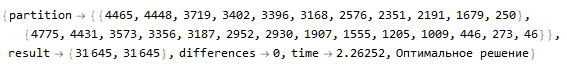

[20,11,8,3,2,0]

In [ ]:
data Tree a b = Empty |
              Node (Tree a b) a b (Tree a b)
              
sort    :: (Ord a) => [a] -> [a]
build   :: (Ord a) => [a] -> Tree a
insert  :: (Ord a) => a -> Tree a -> Tree a --вставление элемента в дерево
flatten :: Tree a -> [a]

-- сортировка
sort ls       =  flatten (build ls)

-- построение с хвоста списка дерева
build []      =  Empty
build (e:ls)  =  insert e (build ls) -- дерево строится с хвоста

-- вставка элемента в дерево
insert e Empty                    =  Node Empty e Empty
insert e (Node t1 n t2) | e < n   =  Node (insert e t1) n t2
                        | e >= n  =  Node t1 n (insert e t2)

-- получение отсортированного списка
flatten Empty = []
flatten (Node t1 n t2) = (flatten t1) ++ (n : (flatten t2))
-- соединение списков ++
-- ++ - разбирает левый список на части, по одному разбирает элементы

In [1]:
[1..10]++[8]

[1,2,3,4,5,6,7,8,9,10,8]

In [4]:
[1..10] ++ [1]

[1,2,3,4,5,6,7,8,9,10,1]

In [5]:
[1] ++ [1..10]

Line 1: Use :
Found:
[1] ++ [1 .. 10]
Why not:
1 : [1 .. 10]

[1,1,2,3,4,5,6,7,8,9,10]

In [10]:
min 1 0

0